# Task : To predict the sales of the market stores.

In this task we need to predict the sales of market stores on the basis of other information given in the dataset like Item_identifier, Item_Weight, etc.

* The target variable is Item_Outlet_Sales

#### Importing various necessary libraries to work on the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('./Downloads/bigdatamart_Train.csv')
test = pd.read_csv('./Downloads/bigdatamart_Test.csv')

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

By looking at both the dataset columns name we can conclude that the target variable (Item_Outlet_Sales) is not present in the test dataset.

#### Now  checking dimensions , description and presence of null values in both datasets

1. train dataset

In [7]:
train.shape

(8523, 12)

In [8]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

By looking at the above outputs we can conclude about the train dataset that:
* The dataset has 8523 rows and 12 columns.
* The description of this dataset is giving mean, max value , min value of columns present in the dataset with continuous data like Item_Visibility, Item_Weight, Item_MRP, Outlet_Establishment_Year and Item_Outlet_Sales.
* The null values are only present in 2 column of the train dataset which are Item_Weight and Outlet_Size.

2. test dataset

In [10]:
test.shape

(5681, 11)

In [11]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [12]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

By looking at the above outputs we can conclude about the test dataset that:
* The dataset has 5681 rows and 11 columns.
* The description of this dataset is giving mean, max value , min value of columns present in the dataset with continuous data like Item_Visibility, Item_Weight, Item_MRP and Outlet_Establishment_Year and.
* The null values are only present in 2 column of the train dataset which are Item_Weight and Outlet_Size.

#### EDA of train dataset

1. Item_Identifier

In [13]:
train['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

By looking at the unique values of Item_Identifier we can observe that all the values have one of the three combinations (FD, DR, NC) of the letters in the first two places of the values. So, Base on that information we can extract data and create a new column.

In [14]:
a = []
for i in train['Item_Identifier']:
    i = i[:2]
    a.append(i)

In [15]:
train['Item_Identifier'] = pd.Series(a)

In [16]:
train['Item_Identifier'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

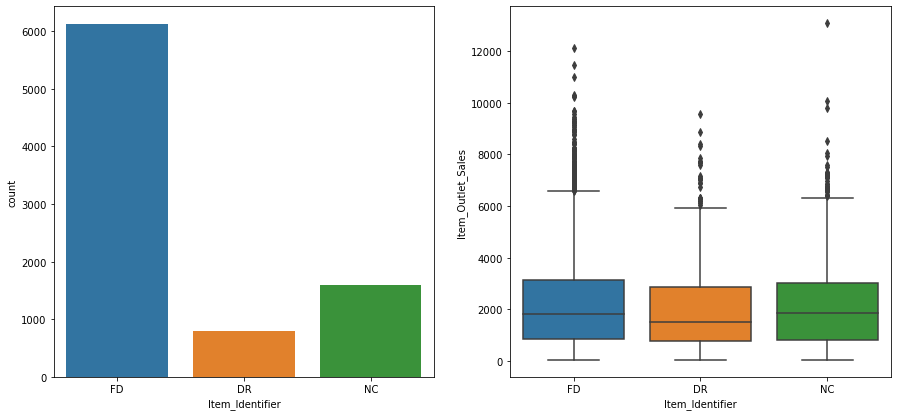

In [17]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['Item_Identifier'])
plt.xlabel('Item_Identifier')
plt.subplot(222)
sns.boxplot(x= 'Item_Identifier', y= 'Item_Outlet_Sales', data= train)
plt.xlabel('Item_Identifier')
plt.ylabel('Item_Outlet_Sales')
plt.show()

By looking at both the graphs of Item_Identifier we can conclude that maximum food present in the stores contain FD Item_Identifier on them from the countplot and from the boxplot we conclude that outliers are present in all the three categories of Item_Identifier.

2. Item_Weight

In [18]:
train['Item_Weight'].unique()

array([ 9.3  ,  5.92 , 17.5  , 19.2  ,  8.93 , 10.395, 13.65 ,    nan,
       16.2  , 11.8  , 18.5  , 15.1  , 17.6  , 16.35 ,  9.   , 13.35 ,
       18.85 , 14.6  , 13.85 , 13.   ,  7.645, 11.65 ,  5.925, 19.25 ,
       18.6  , 18.7  , 17.85 , 10.   ,  8.85 ,  9.8  , 13.6  , 21.35 ,
       12.15 ,  6.42 , 19.6  , 15.85 ,  7.39 , 10.195,  9.895, 10.895,
        7.905,  9.195,  8.365,  7.97 , 17.7  , 19.35 ,  8.645, 15.6  ,
       18.25 ,  7.855,  7.825,  8.39 , 12.85 , 19.   ,  5.905,  7.76 ,
       16.75 , 15.5  ,  6.055,  6.305, 20.85 , 20.75 ,  8.895, 19.7  ,
        8.75 , 13.3  ,  8.31 , 19.75 , 17.1  , 10.5  ,  6.635, 14.15 ,
        8.89 ,  9.1  ,  7.5  , 16.85 ,  7.485, 11.6  , 12.65 , 20.25 ,
        8.6  , 12.6  ,  8.88 , 20.5  , 13.5  ,  7.235,  6.92 ,  8.02 ,
       12.8  , 16.6  , 14.   , 16.   , 21.25 ,  7.365, 18.35 ,  5.465,
        7.27 ,  6.155, 19.5  , 15.2  , 14.5  , 13.1  , 12.3  , 11.1  ,
       11.3  ,  5.75 , 11.35 ,  6.525, 10.3  ,  5.78 , 11.85 , 18.75 ,
      

First we need to fill the null values of this column before plotting the graph. To fill the null values we cannot use the mean or median method since the both methods will create the data bias in the column. So, we need to fill the null values with the random values using back fill or forward fill.

In [19]:
train['Item_Weight'] = train['Item_Weight'].fillna(method= 'bfill')

In [20]:
train['Item_Weight'].isnull().sum()

0

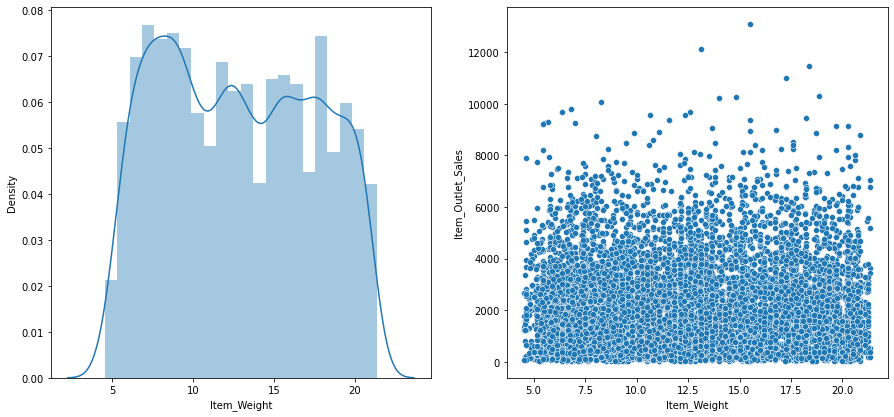

In [21]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(train['Item_Weight'])
plt.xlabel('Item_Weight')
plt.subplot(222)
sns.scatterplot(x= 'Item_Weight', y= 'Item_Outlet_Sales', data= train)
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.show()

By looking at both the graphs of Item_Weight we can conclude that it is difficult to determine the skewness of the data and plot line is showing multiple peak in data but data has highest density around 7 or 8 from the distplot and from the scatterplot we can conclude that data is scattered all over the place and it is not showing the positive correlation with the Item_Outlet_Sales column.

3. Item_Fat_Content

In [22]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

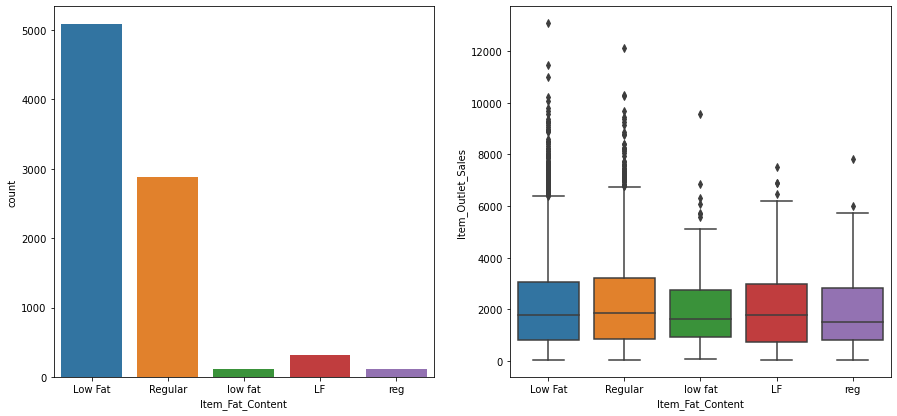

In [23]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['Item_Fat_Content'])
plt.xlabel('Item_Fat_Content')
plt.subplot(222)
sns.boxplot(x= 'Item_Fat_Content', y= 'Item_Outlet_Sales', data= train)
plt.xlabel('Item_Fat_Content')
plt.ylabel('Item_Outlet_Sales')
plt.show()

By looking at both the graphs of Item_Fat_Content we can conclude that maximum number food present is with low fat content from the countplot and from the boxplot we can conclude that outliers are present in each category of Item_Fat_Content column. 

looking at the graphs of Item_Fat_Content we can observe that there are only two category present in it which are Regular and Low Fat but since they are written differently so it has created five categories. So we need to refine the data a little more.

In [24]:
def reg(content):
    if (content == 'low fat'):
        return('Low Fat')
    elif (content == 'LF'):
        return('Low Fat')
    elif (content == 'reg'):
        return('Regular')
    else:
        return(content)

In [25]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].apply(reg)

In [26]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

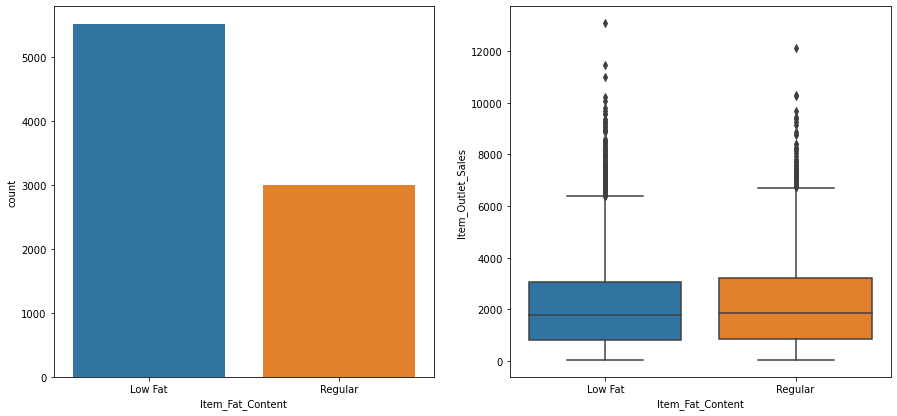

In [27]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['Item_Fat_Content'])
plt.xlabel('Item_Fat_Content')
plt.subplot(222)
sns.boxplot(x= 'Item_Fat_Content', y= 'Item_Outlet_Sales', data= train)
plt.xlabel('Item_Fat_Content')
plt.ylabel('Item_Outlet_Sales')
plt.show()

Now, by looking at more refined data graphs of the Item_Fat_Content we can conclude that maximum number of foods are present with the Low Fat content in them form the countplot and from the boxplot we can conclude that outliers are present in both the categories of the Item_Fat_Content.

4. Item_Visibility

In [28]:
train['Item_Visibility'].unique()

array([0.0160473 , 0.01927822, 0.01676007, ..., 0.03518627, 0.14522065,
       0.04487828])

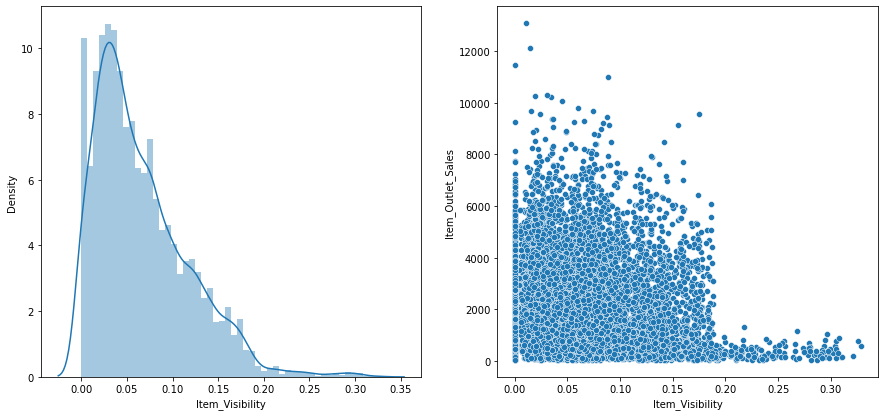

In [29]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(train['Item_Visibility'])
plt.xlabel('Item_Visibility')
plt.subplot(222)
sns.scatterplot(x= 'Item_Visibility', y= 'Item_Outlet_Sales', data= train)
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.show()

By looking at both the graphs of Item_Visibility we can conclude that the data is positively skewed with data having highest density at around 0.027 or 0.03 and from the scatterplot the data is not giving any correlation with the target column but we can observe that food with high visibility has low sales and food with zero visibility has has high sales which is not making any snese but that is what graph is showing.

5. Item_Type

In [30]:
train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

Before plotting the graph we need to refine the data more by dividing the food into perishable and non perishable category so that it would be easy to work on them.

In [31]:
perishables = ['Dairy', 'Meat', 'Fruits and Vegetables',
              'Frozen Foods', 'Breakfast', 'Breads', 'Seafood']

In [32]:
def perish(x):
    if x in perishables:
        return('Perishables')
    else:
        return('Non-Perishables')

In [33]:
train['Item_Type'] = train['Item_Type'].apply(perish)

In [34]:
train['Item_Type'].unique()

array(['Perishables', 'Non-Perishables'], dtype=object)

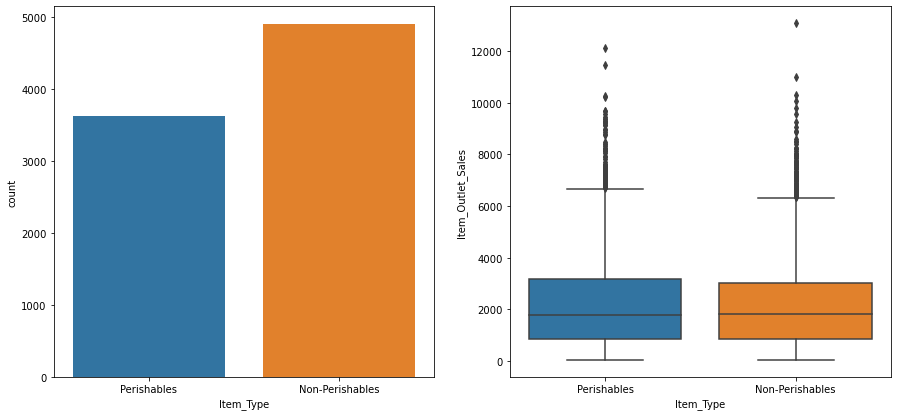

In [35]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['Item_Type'])
plt.xlabel('Item_Type')
plt.subplot(222)
sns.boxplot(x= 'Item_Type', y= 'Item_Outlet_Sales', data= train)
plt.xlabel('Item_Type')
plt.ylabel('Item_Outlet_Sales')
plt.show()

By looking at both the graphs of Item_Type we can conclude that maximum number of foods is present with Non-Perishables type from the countplot and from the boxplot we can conclude that outliers are present in both the categories of the Item_Type.

6. Item_MRP

In [36]:
train['Item_MRP'].unique()

array([249.8092,  48.2692, 141.618 , ...,  57.5904, 214.5218,  75.467 ])

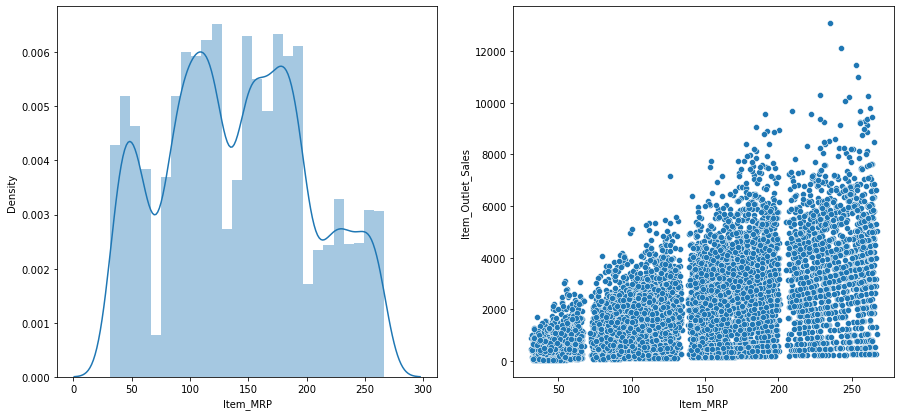

In [37]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(train['Item_MRP'])
plt.xlabel('Item_MRP')
plt.subplot(222)
sns.scatterplot(x= 'Item_MRP', y= 'Item_Outlet_Sales', data= train)
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()

By looking at both the graphs of Item_MRP we can conclude that we cannot determine the skewness of the data as plot line is showing multiple peaks in the graphs and the data has highest density around 105 or 110 form the distplot and from the scatterplot we can conclude that food with the high MRP has most outlet sales but the plot is hsowing this behaviour against the human nature which tends to look for the discount on any possible market store.

7. Outlet_Identifier

In [38]:
train['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

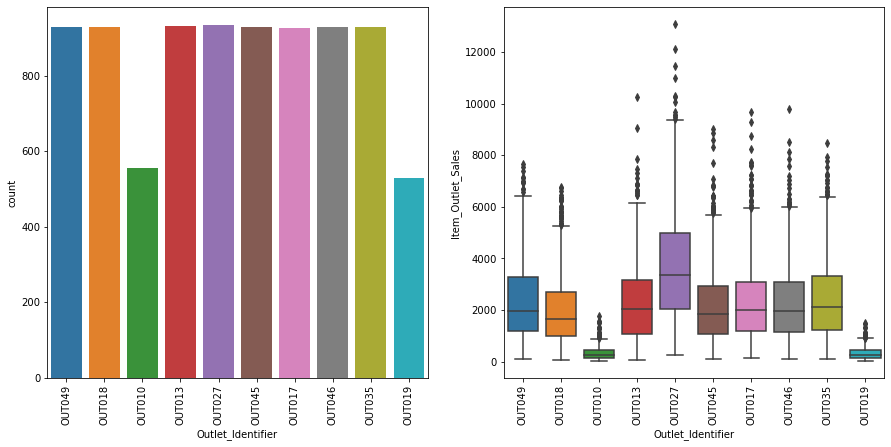

In [39]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['Outlet_Identifier'])
plt.xlabel('Outlet_Identifier')
plt.xticks(rotation = 90)
plt.subplot(222)
sns.boxplot(x= 'Outlet_Identifier', y= 'Item_Outlet_Sales', data= train)
plt.xlabel('Outlet_Identifier')
plt.xticks(rotation= 90)
plt.ylabel('Item_Outlet_Sales')
plt.show()

By looking at both the graphs of Outlet_Identifier we can conclude that we cannot determine the maximum number of outlet_Identifier from the countplot and from the boxplot we can conclude that outliers are present in every category of Outlet_Identifier.

Now, we have to reform the data more for it to make it more convenient to work on .

In [40]:
id = []
for i in train['Outlet_Identifier']:
    i = i[-2:]
    id.append(i)

In [41]:
train['Outlet_Identifier'] = pd.Series(id)

In [42]:
train['Outlet_Identifier'].unique()

array(['49', '18', '10', '13', '27', '45', '17', '46', '35', '19'],
      dtype=object)

8. Outlet_Establishment_Year

In [43]:
train['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [44]:
train['Outlet_Establishment_Year'].dtype

dtype('int64')

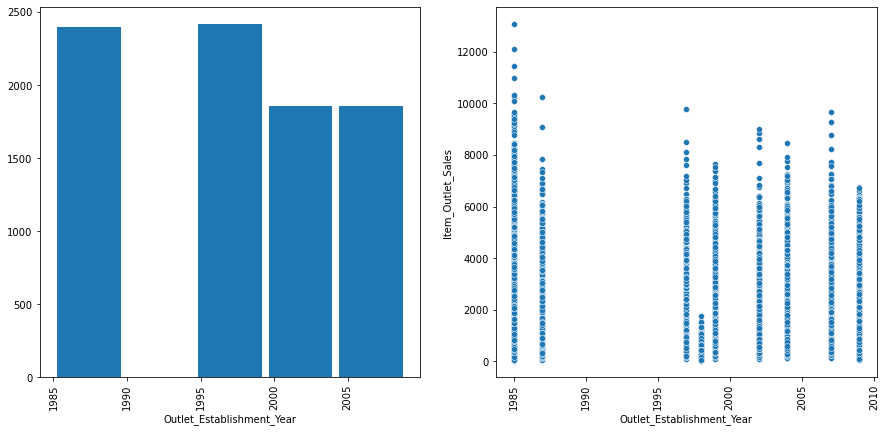

In [45]:
plt.figure(figsize= [15,15])
plt.subplot(221)
plt.hist(train['Outlet_Establishment_Year'], bins= 5, rwidth= 0.9)
plt.xlabel('Outlet_Establishment_Year')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'Outlet_Establishment_Year', y= 'Item_Outlet_Sales', data= train)
plt.xlabel('Outlet_Establishment_Year')
plt.xticks(rotation= 90)
plt.ylabel('Item_Outlet_Sales')
plt.show()

By looking at both garphs of Outlet_Establishment_Year we can conclude that no store was opened between 1990 and 1995 and from the scatterplot we can conclude that most number of stores were opened in 1985.

Since, in the question it is mentioned that data is from 2013, so, we can calculate the age of the store from it.

In [46]:
train['Store_Age'] = 2013 - train['Outlet_Establishment_Year'] 

9. Outlet_Size

In [47]:
train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

Filling the null values before plotting the graph using method of filling values randomly.

In [48]:
train['Outlet_Size'] = train['Outlet_Size'].fillna(method= 'bfill')

In [49]:
train['Outlet_Size'].isnull().sum()

0

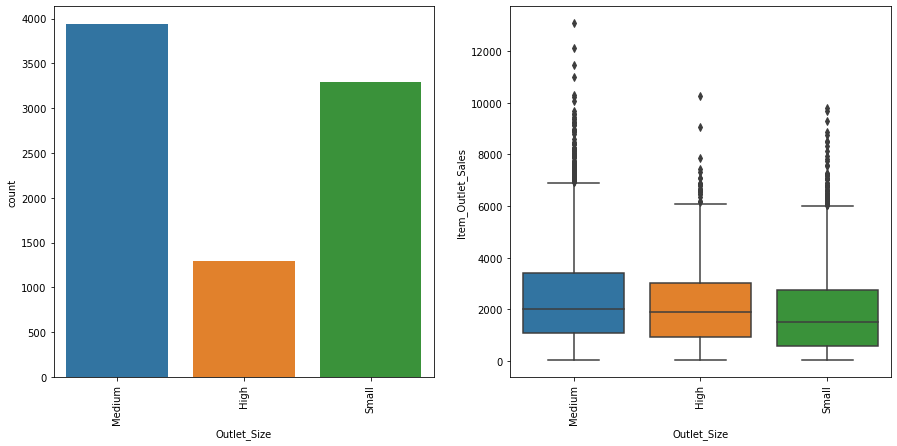

In [50]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['Outlet_Size'])
plt.xlabel('Outlet_Size')
plt.xticks(rotation = 90)
plt.subplot(222)
sns.boxplot(x= 'Outlet_Size', y= 'Item_Outlet_Sales', data= train)
plt.xlabel('Outlet_Size')
plt.xticks(rotation= 90)
plt.ylabel('Item_Outlet_Sales')
plt.show()

By looking at both the graphs of Outlet_Size we can conclude that most number stores are of medium size from the countplot and from the boxplot we can conclude that outliers are present in every categories of Outlet_Size.

10. Outlet_Location_Type

In [51]:
train['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

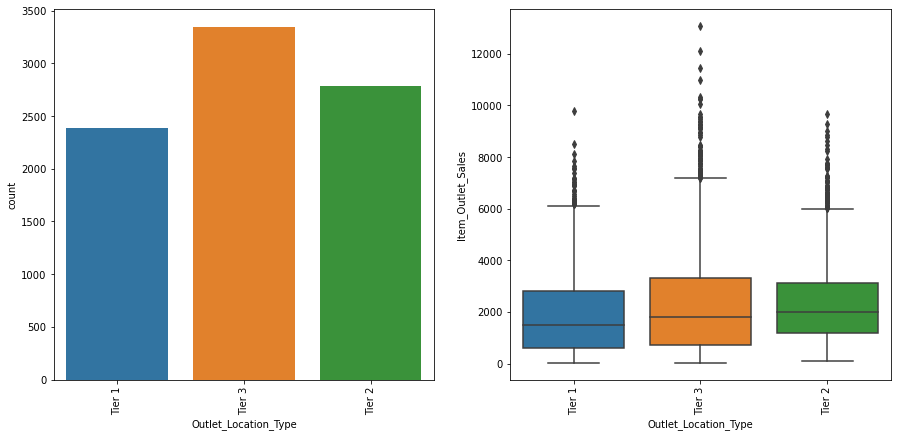

In [52]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['Outlet_Location_Type'])
plt.xlabel('Outlet_Location_Type')
plt.xticks(rotation = 90)
plt.subplot(222)
sns.boxplot(x= 'Outlet_Location_Type', y= 'Item_Outlet_Sales', data= train)
plt.xlabel('Outlet_Location_Type')
plt.xticks(rotation= 90)
plt.ylabel('Item_Outlet_Sales')
plt.show()

By looking at both the graphs of Outlet_Location_Type we can conclude that most number of stores are present in Tier 3 location type from the countplot and from the boxplot we can conclude that outliers are present in every categories of Outlet_Location_Type.

11. Outlet_Type

In [53]:
train['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

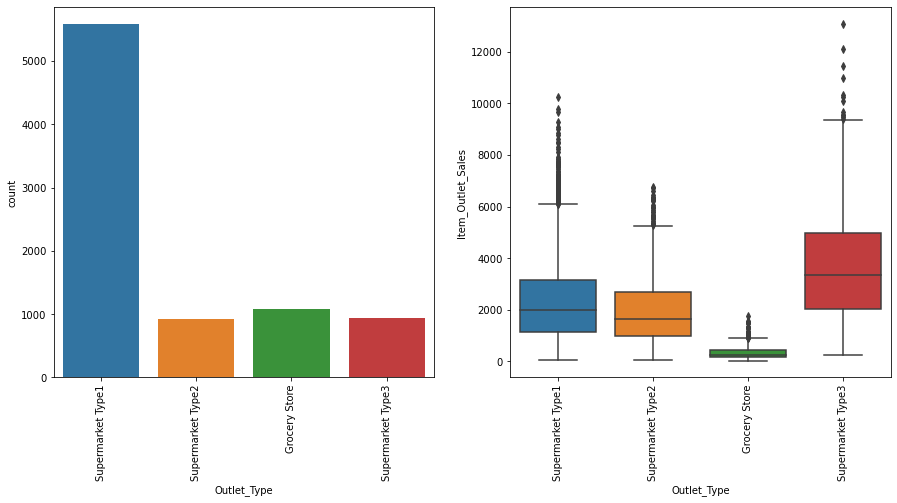

In [54]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['Outlet_Type'])
plt.xlabel('Outlet_Type')
plt.xticks(rotation = 90)
plt.subplot(222)
sns.boxplot(x= 'Outlet_Type', y= 'Item_Outlet_Sales', data= train)
plt.xlabel('Outlet_Type')
plt.xticks(rotation= 90)
plt.ylabel('Item_Outlet_Sales')
plt.show()

By looking at both the graphs of Outlet_Type we can conclude that most number of stores present are in Supermarket Type 1 Outlet_Type from the countplot and from the boxplot we can conclude that outliers are present in every categories of Outlet_Type.

In [55]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Store_Age
0,FD,9.30,Low Fat,0.016047,Perishables,249.8092,49,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DR,5.92,Regular,0.019278,Non-Perishables,48.2692,18,2009,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FD,17.50,Low Fat,0.016760,Perishables,141.6180,49,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FD,19.20,Regular,0.000000,Perishables,182.0950,10,1998,High,Tier 3,Grocery Store,732.3800,15
4,NC,8.93,Low Fat,0.000000,Non-Perishables,53.8614,13,1987,High,Tier 3,Supermarket Type1,994.7052,26


Now checking data types of every column from train dataset.

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Store_Age                  8523 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage:

Now changing columns data type into numeric data type.

In [57]:
train['Item_Identifier'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [58]:
train['Item_Identifier'] = train['Item_Identifier'].replace(['FD','DR','NC'],[0,1,2])

In [59]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [60]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(['Low Fat','Regular'],[0,1])

In [61]:
train['Item_Type'].unique()

array(['Perishables', 'Non-Perishables'], dtype=object)

In [62]:
train['Item_Type'] = train['Item_Type'].replace(['Perishables','Non-Perishables'],[0,1])

In [63]:
train['Outlet_Identifier'].unique()

array(['49', '18', '10', '13', '27', '45', '17', '46', '35', '19'],
      dtype=object)

In [64]:
train['Outlet_Identifier'] = pd.to_numeric(train['Outlet_Identifier'])

In [65]:
train['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [66]:
train['Outlet_Size'] = train['Outlet_Size'].replace(['Small','Medium','High'],[0,1,2])

In [67]:
train['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [68]:
train['Outlet_Location_Type'] = train['Outlet_Location_Type'].replace(['Tier 1','Tier 2','Tier 3'],[1,2,3])

In [69]:
train['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [70]:
train['Outlet_Type'] = train['Outlet_Type'].replace(['Grocery Store','Supermarket Type1','Supermarket Type2','Supermarket Type3'],
                                                    [0,1,2,3])

In [71]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int64  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int64  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int64  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   int64  
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Store_Age                  8523 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 865.7 KB


Now that data type of every column has changed to int or float. So we can apply heatmap to see the correlation with target columns.

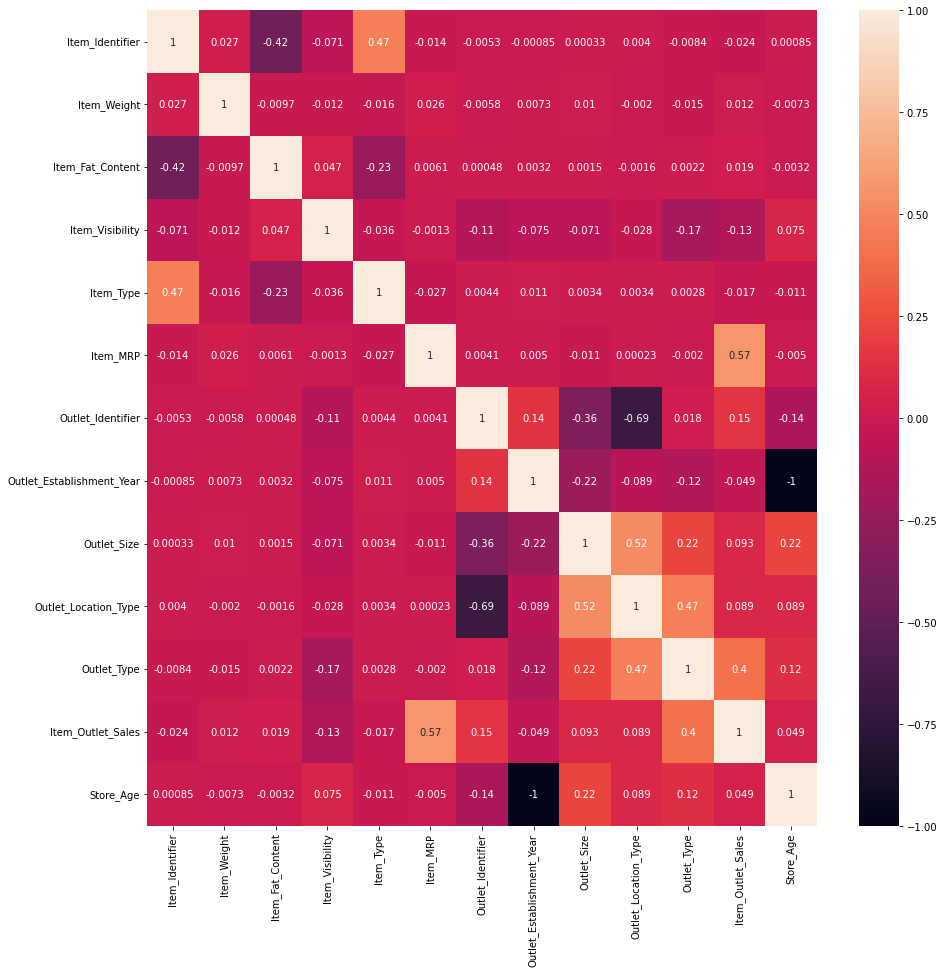

In [72]:
plt.figure(figsize= [15,15])
sns.heatmap(train.corr(), annot= True)
plt.show()

The heat map shows that target column (Item_Outlet_Sales) has high positive correlation with Item_MRP, Outlet_Identifier and Outlet_Type columns.

#### So now we can apply GridSearchCV to see which model has high accuracy for this dataset.

1. Linear Regression

In [73]:
lr = LinearRegression()

In [74]:
lrf = GridSearchCV(lr, param_grid= {'n_jobs': [1,2,3,4,5,6]}, scoring= 'r2', cv= 5)

In [75]:
X_train = train.drop(['Item_Outlet_Sales'], axis= 1)
y_train = train['Item_Outlet_Sales']

In [76]:
lrf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'n_jobs': [1, 2, 3, 4, 5, 6]}, scoring='r2')

In [77]:
lrf.best_params_

{'n_jobs': 1}

In [78]:
lrf.score(X_train, y_train)

0.5118994613128401

2. Decision Tree Regression

In [79]:
dt = DecisionTreeRegressor()

In [80]:
dtf = GridSearchCV(dt, param_grid= {'max_depth': [1,2,3,4,5], 'min_samples_split': [1,2,3,4,5], 'min_samples_leaf': [1,2,3,4,5]},
                  scoring= 'r2', cv= 5)

In [81]:
dtf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5]},
             scoring='r2')

In [82]:
dtf.best_params_

{'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [83]:
dtf.score(X_train, y_train)

0.6036337148999649

3. Random Forest Regression

In [84]:
rf = RandomForestRegressor()

In [85]:
rff = GridSearchCV(rf, param_grid= {'max_depth': [1,2,3,4,5], 'min_samples_split': [1,2,3,4,5], 'min_samples_leaf': [1,2,3,4,5]},
                  scoring= 'r2', cv= 5)

In [86]:
rff.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5]},
             scoring='r2')

In [87]:
rff.best_params_

{'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 4}

In [88]:
rff.score(X_train,y_train)

0.6090492476672249

4. Bagging Regression

In [89]:
br = BaggingRegressor(base_estimator= DecisionTreeRegressor(max_depth= 5, min_samples_leaf= 5, min_samples_split= 2))

In [90]:
brf = GridSearchCV(br, param_grid= {'n_estimators': [10,20,30,40,50], 'max_features': [1,2,3,4,5], 'max_samples': [1,2,3,4,5]},
                  scoring= 'r2', cv= 5)

In [91]:
brf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=5,
                                                                             min_samples_leaf=5)),
             param_grid={'max_features': [1, 2, 3, 4, 5],
                         'max_samples': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='r2')

In [92]:
brf.best_params_

{'max_features': 5, 'max_samples': 5, 'n_estimators': 40}

In [93]:
brf.score(X_train, y_train)

-0.003633157972413148

So, By looking at all the 4 model after GridSearchCV score of r2_score, we can conclude that best model for this dataset is Random Forest regressor model.

#### Now working on the test dataset

In [94]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


#### EDA : For test dataset we have to do same things on the dataset that we have done on the train dataset and we have to plot only unilateral plot of the columns because there is target column present in the test dataset.

1. Item_Identifier

In [95]:
test['Item_Identifier'] = pd.Series(a)

In [96]:
test['Item_Identifier'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

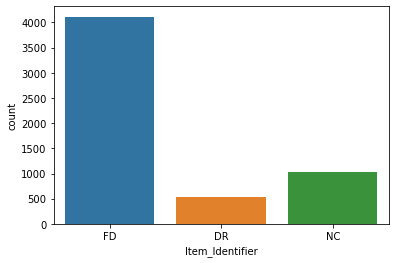

In [97]:
sns.countplot(test['Item_Identifier'])
plt.xlabel('Item_Identifier')
plt.show()

by looking at the countplot for the Item_Identifier we conclude that maximum number of food is present with FD Item_Identifier on them.

2. Item_Weight

In [98]:
test['Item_Weight'].unique()

array([20.75 ,  8.3  , 14.6  ,  7.315,    nan,  9.8  , 19.35 ,  6.305,
        5.985, 16.6  ,  6.59 ,  4.785, 16.75 ,  6.135, 19.85 , 17.85 ,
       13.6  ,  7.1  , 19.2  , 13.65 ,  6.785, 13.   ,  5.825, 13.8  ,
       12.8  ,  9.5  , 12.5  ,  5.78 , 10.395, 18.35 , 21.1  , 19.75 ,
        8.43 , 15.35 ,  6.71 , 10.195, 11.65 , 12.85 , 12.15 , 18.25 ,
        5.98 , 12.65 , 13.1  , 20.7  ,  7.855, 13.35 , 17.25 ,  8.315,
       21.35 ,  5.88 ,  7.435, 14.65 , 14.   , 18.2  , 17.6  ,  7.71 ,
        7.81 , 16.35 , 16.1  ,  5.34 ,  5.51 ,  6.61 ,  6.38 ,  8.71 ,
       17.75 ,  6.44 , 12.6  ,  7.935, 18.5  ,  6.035, 11.8  ,  6.26 ,
       16.5  , 15.7  ,  6.635,  8.155,  6.175,  8.18 ,  8.355,  6.905,
       20.35 , 19.25 ,  5.48 ,  5.425, 12.1  , 11.   ,  5.765,  5.44 ,
        6.13 ,  8.195, 14.15 , 14.3  ,  5.635,  5.73 ,  7.155, 15.2  ,
       15.25 ,  8.76 ,  9.13 , 19.6  , 10.   , 11.3  ,  6.57 , 13.15 ,
        4.635, 10.6  ,  9.3  ,  7.02 ,  7.825, 19.1  ,  7.51 ,  8.85 ,
      

Filling the null values of Item_Weight By filling the random values by using back fill or forward fill methods.

In [99]:
test['Item_Weight'] = test['Item_Weight'].fillna(method= 'bfill')

In [100]:
test['Item_Weight'].isnull().sum()

0

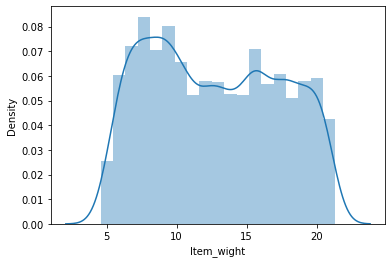

In [101]:
sns.distplot(test['Item_Weight'])
plt.xlabel('Item_wight')
plt.show()

By looking at the distplot of the Item_Weight we can conclude that it is difficult to determine the skewness of the data but data's density is highest around 7 or 8.

3. Item_Fat_Content

In [102]:
test['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

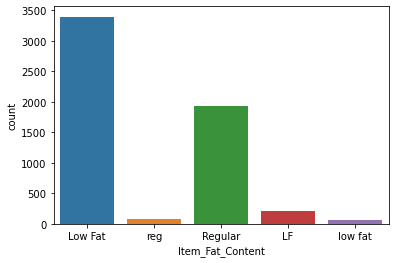

In [103]:
sns.countplot(test['Item_Fat_Content'])
plt.xlabel('Item_Fat_Content')
plt.show()

Now by looking at the countplot of the Item_Fat_Contnet we can conclude that maximum number of food has low fat content in them but by looking at the plot we can see that there are only two categories of at in there as the low fat is written differently and so is Regular. So we can refine it more to make it easy to work with.

In [104]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].apply(reg)

In [105]:
test['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

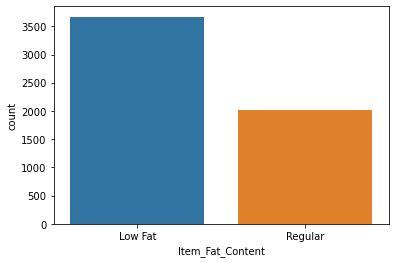

In [106]:
sns.countplot(test['Item_Fat_Content'])
plt.xlabel('Item_Fat_Content')
plt.show()

By looking at the more refined data of countplot of Item_Fat_Content we can conclude that maximum number of food contains low fat content.

4. Item_Visibility

In [107]:
test['Item_Visibility'].unique()

array([0.00756484, 0.03842768, 0.09957491, ..., 0.1429909 , 0.07352856,
       0.10472015])

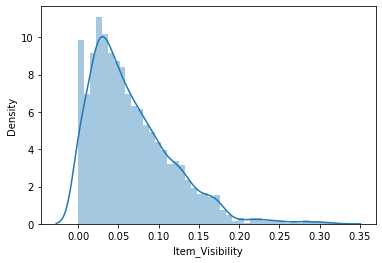

In [108]:
sns.distplot(test['Item_Visibility'])
plt.xlabel('Item_Visibility')
plt.show()

By looking at the distplot of Item_Visibility we can conclude that the data is positively skewed with data's density is highest at around 0.02 or 0.03.

5. Item_Type

In [109]:
test['Item_Type'].unique()

array(['Snack Foods', 'Dairy', 'Others', 'Fruits and Vegetables',
       'Baking Goods', 'Health and Hygiene', 'Breads', 'Hard Drinks',
       'Seafood', 'Soft Drinks', 'Household', 'Frozen Foods', 'Meat',
       'Canned', 'Starchy Foods', 'Breakfast'], dtype=object)

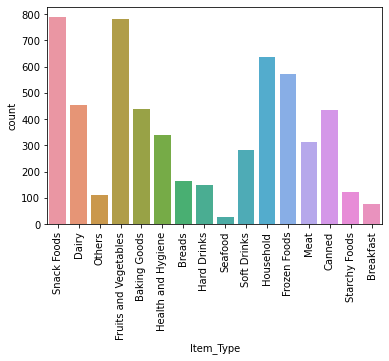

In [110]:
sns.countplot(test['Item_Type'])
plt.xlabel('Item_Type')
plt.xticks(rotation= 90)
plt.show()

By looking at the countplot of Item_Type we can conclude that maximum number of foods in store are of Snack Foods and Fruits and Vegetables Item_Type. 
We can also refine this data by dividing its category into perishables and non-perishables.

In [111]:
test['Item_Type'] = test['Item_Type'].apply(perish)

In [112]:
test['Item_Type'].unique()

array(['Non-Perishables', 'Perishables'], dtype=object)

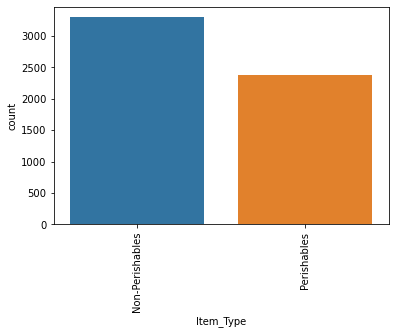

In [113]:
sns.countplot(test['Item_Type'])
plt.xlabel('Item_Type')
plt.xticks(rotation= 90)
plt.show()

By looking at the countplot of Item_Type we can conclude that most foods are of Non-Perishables food type.

6. Item_MRP

In [114]:
test['Item_MRP'].unique()

array([107.8622,  87.3198, 241.7538, ..., 141.3154, 214.6218,  79.796 ])

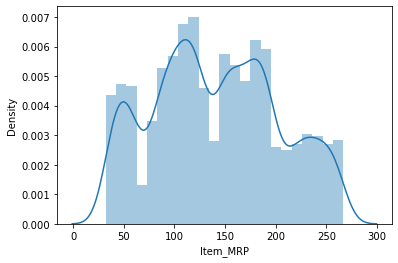

In [115]:
sns.distplot(test['Item_MRP'])
plt.xlabel('Item_MRP')
plt.show()

By looking at the distplot of Item_MRP we can conclude that it is difficult to determine the skewness of the data and plotline is also showing multiple peak in the plot and the data's density is highest around 110 or 115.

7. Outlet_Identifier

In [116]:
test['Outlet_Identifier'].unique()

array(['OUT049', 'OUT017', 'OUT010', 'OUT027', 'OUT046', 'OUT018',
       'OUT045', 'OUT019', 'OUT013', 'OUT035'], dtype=object)

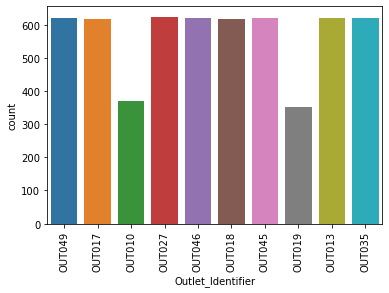

In [117]:
sns.countplot(test['Outlet_Identifier'])
plt.xlabel('Outlet_Identifier')
plt.xticks(rotation= 90)
plt.show()

By looking at the countplot we can conclude that most Outlet_Identifiers have almost same number of stores in them except OUT010 and OUT019. But we can refine this data by removing OUT from them to make data continuous.

In [118]:
test['Outlet_Identifier'] = pd.Series(id)

In [119]:
test['Outlet_Identifier'].unique()

array(['49', '18', '10', '13', '27', '45', '17', '46', '35', '19'],
      dtype=object)

8. Outlet_Establishment_Year

In [120]:
test['Outlet_Establishment_Year'].unique()

array([1999, 2007, 1998, 1985, 1997, 2009, 2002, 1987, 2004], dtype=int64)

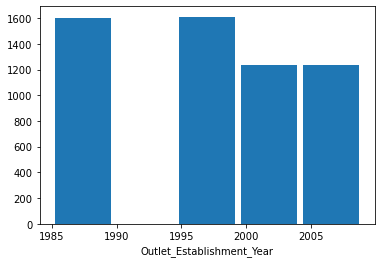

In [121]:
plt.hist(test['Outlet_Establishment_Year'], bins= 5, rwidth= 0.9)
plt.xlabel('Outlet_Establishment_Year')
plt.show()

By looking at the histogram of the Outlet_Establishment_Year we can conclude that there is no store opened in between 1990 and 1995. But we can extract the age of the store as we know that data is from 2013.

In [122]:
test['Store_Age'] = 2013 - test['Outlet_Establishment_Year']

9. Outlet_Size

In [123]:
test['Outlet_Size'].unique()

array(['Medium', nan, 'Small', 'High'], dtype=object)

Filling the null values randomly using backfill or forwardfill method.

In [124]:
test['Outlet_Size'] = test['Outlet_Size'].fillna(method= 'bfill')

In [125]:
test['Outlet_Size'].isnull().sum()

3

In [126]:
test['Outlet_Size'] = test['Outlet_Size'].fillna(method= 'ffill')

In [127]:
test['Outlet_Size'].isnull().sum()

0

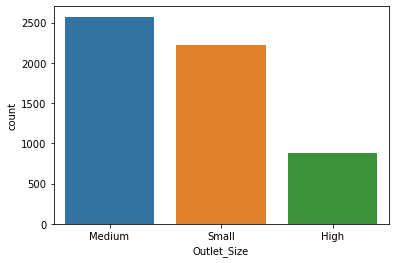

In [128]:
sns.countplot(test['Outlet_Size'])
plt.xlabel('Outlet_Size')
plt.show()

By looking at the countplot of Outlet_Size we can conclude that most number of stores present are of medium size.

10. Outlet_Type

In [129]:
test['Outlet_Type'].unique()

array(['Supermarket Type1', 'Grocery Store', 'Supermarket Type3',
       'Supermarket Type2'], dtype=object)

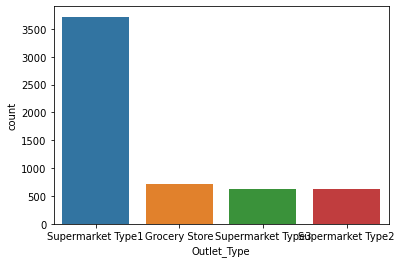

In [130]:
sns.countplot(test['Outlet_Type'])
plt.xlabel('Outlet_Type')
plt.show()

By looking at the countplot of Outlet_Type we can conclude that most number present are of Supermarket Type1 Outlet_Type.

11. Outlet_Location_Type

In [131]:
test['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)

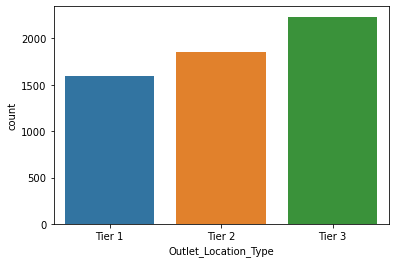

In [132]:
sns.countplot(test['Outlet_Location_Type'])
plt.xlabel('Outlet_Location_Type')
plt.show()

By looking at the countplot of Outlet_Location_Type we can conclude that most stores present are at Tier 3 Outlet_Location_Type.

#### Now Changing the data type of columns to int or float data type.

In [133]:
test['Item_Identifier'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [134]:
test['Item_Identifier'] = test['Item_Identifier'].replace(['FD','DR','NC'],[0,1,2])

In [135]:
test['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [136]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace(['Low Fat','Regular'],[0,1])

In [137]:
test['Item_Type'].unique()

array(['Non-Perishables', 'Perishables'], dtype=object)

In [138]:
test['Item_Type'] = test['Item_Type'].replace(['Perishables','Non-Perishables'],[0,1])

In [139]:
test['Outlet_Identifier'].unique()

array(['49', '18', '10', '13', '27', '45', '17', '46', '35', '19'],
      dtype=object)

In [140]:
test['Outlet_Identifier'] = pd.to_numeric(test['Outlet_Identifier'])

In [141]:
test['Outlet_Size'].unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [142]:
test['Outlet_Size'] = test['Outlet_Size'].replace(['Small','Medium','High'],[0,1,2])

In [143]:
test['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)

In [144]:
test['Outlet_Location_Type'] = test['Outlet_Location_Type'].replace(['Tier 1','Tier 2','Tier 3'],[1,2,3])

In [145]:
test['Outlet_Type'].unique()

array(['Supermarket Type1', 'Grocery Store', 'Supermarket Type3',
       'Supermarket Type2'], dtype=object)

In [146]:
test['Outlet_Type'] = test['Outlet_Type'].replace(['Grocery Store','Supermarket Type1','Supermarket Type2','Supermarket Type3'],
                                                    [0,1,2,3])

In [147]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Store_Age
0,0,20.750,0,0.007565,1,107.8622,49,1999,1,1,1,14
1,1,8.300,1,0.038428,0,87.3198,18,2007,1,2,1,6
2,0,14.600,0,0.099575,1,241.7538,49,1998,1,3,0,15
3,0,7.315,0,0.015388,1,155.0340,10,2007,1,2,1,6
4,2,9.800,1,0.118599,0,234.2300,13,1985,1,3,3,28


In [148]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   int64  
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   int64  
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   int64  
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   int64  
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   int64  
 9   Outlet_Location_Type       5681 non-null   int64  
 10  Outlet_Type                5681 non-null   int64  
 11  Store_Age                  5681 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 532.7 KB


In [149]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int64  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int64  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int64  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   int64  
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Store_Age                  8523 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 865.7 KB


#### Now removing the outliers by scaling the data.

In [150]:
scaler = StandardScaler()

In [151]:
scaledX_train = scaler.fit_transform(X_train)

In [152]:
scaledX_test = scaler.transform(test)

#### Now applying the Random Forest Regression model as we know that it is best for this dataset from the GridSearchCV.

In [153]:
rf = RandomForestRegressor(max_depth= 5, min_samples_leaf= 5, min_samples_split= 4)

In [154]:
pred = rf.fit(scaledX_train, y_train).predict(scaledX_test)

In [155]:
pred

array([1555.16920908, 1473.34474278,  563.92254036, ..., 1976.9460372 ,
       3659.28464932, 1310.23475587])

In [156]:
prediction = pd.DataFrame({'Sales Prediciton': np.round(pred, 2)})

In [157]:
prediction

,Sales Prediciton
0,1555.17
1,1473.34
2,563.92
3,2493.00
4,6098.84
...,...
5676,2030.80
5677,2758.72
5678,1976.95
5679,3659.28


#### Hence prediction of the sales for the Bigmart Sales dataset has been made using best regression model with best hyperparameter tuning based on the GridSearchCV. So, the objective hasbeen achieved. 